In [1]:
from microstructpy.markets.continuous import ContinuousDoubleAuction
from microstructpy.traders.noise import *
from microstructpy.traders.market_maker import *
from microstructpy.traders.informed import *
from microstructpy.traders.ensemble import ensemble_traders
from microstructpy.visualization.summary import participant_comparison, price_path
from microstructpy.metrics.trader import *
from microstructpy.metrics.market import *
from microstructpy.markets.continuous import ContinuousDoubleAuction
import microstructpy.traders.policies as pol 
from functools import partial
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
market = ContinuousDoubleAuction(initial_fair_price=1000)
mm1 = BaseMarketMaker(market, fair_price_strategy=pol.fairprice_orderflow_sign(10, 2),
                               spread_strategy=pol.spread_mm_orderflow_imbalance(window=5, agressiveness=1, min_halfspread=3, inventory_risk_factor=20),
                               volume_strategy=pol.volume_mm_max_fraction(0.1),
                               max_inventory=1000)
mm2 = BaseMarketMaker(market, fair_price_strategy=pol.fairprice_orderflow_sign(10, 2),
                               spread_strategy=pol.spread_mm_orderflow_imbalance(5, 2, 5, 10), 
                               volume_strategy=pol.volume_mm_max_fraction(0.1),
                               max_inventory=1000)
mm3 = BaseMarketMaker(market, fair_price_strategy=pol.fairprice_orderflow_magnitude(10, 3),
                               spread_strategy=pol.spread_mm_orderflow_imbalance(20, 2, 7, 10), 
                               volume_strategy=pol.volume_mm_max_fraction(0.1),
                               max_inventory=1000)


noise = NoiseTrader(market, submission_rate=1.0, volume_size=lambda: np.random.randint(5, 50))
noise2 = NoiseTrader(market, submission_rate=1.0, volume_size=lambda: np.random.randint(1, 20))

informed = BaseInformedTrader(market, price_strategy=pol.fairprice_news_impact_linear(1),
                              volume_strategy=pol.volume_informed_constant(10), max_inventory=1000)

In [ ]:
market.run(500)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 3311.25it/s]


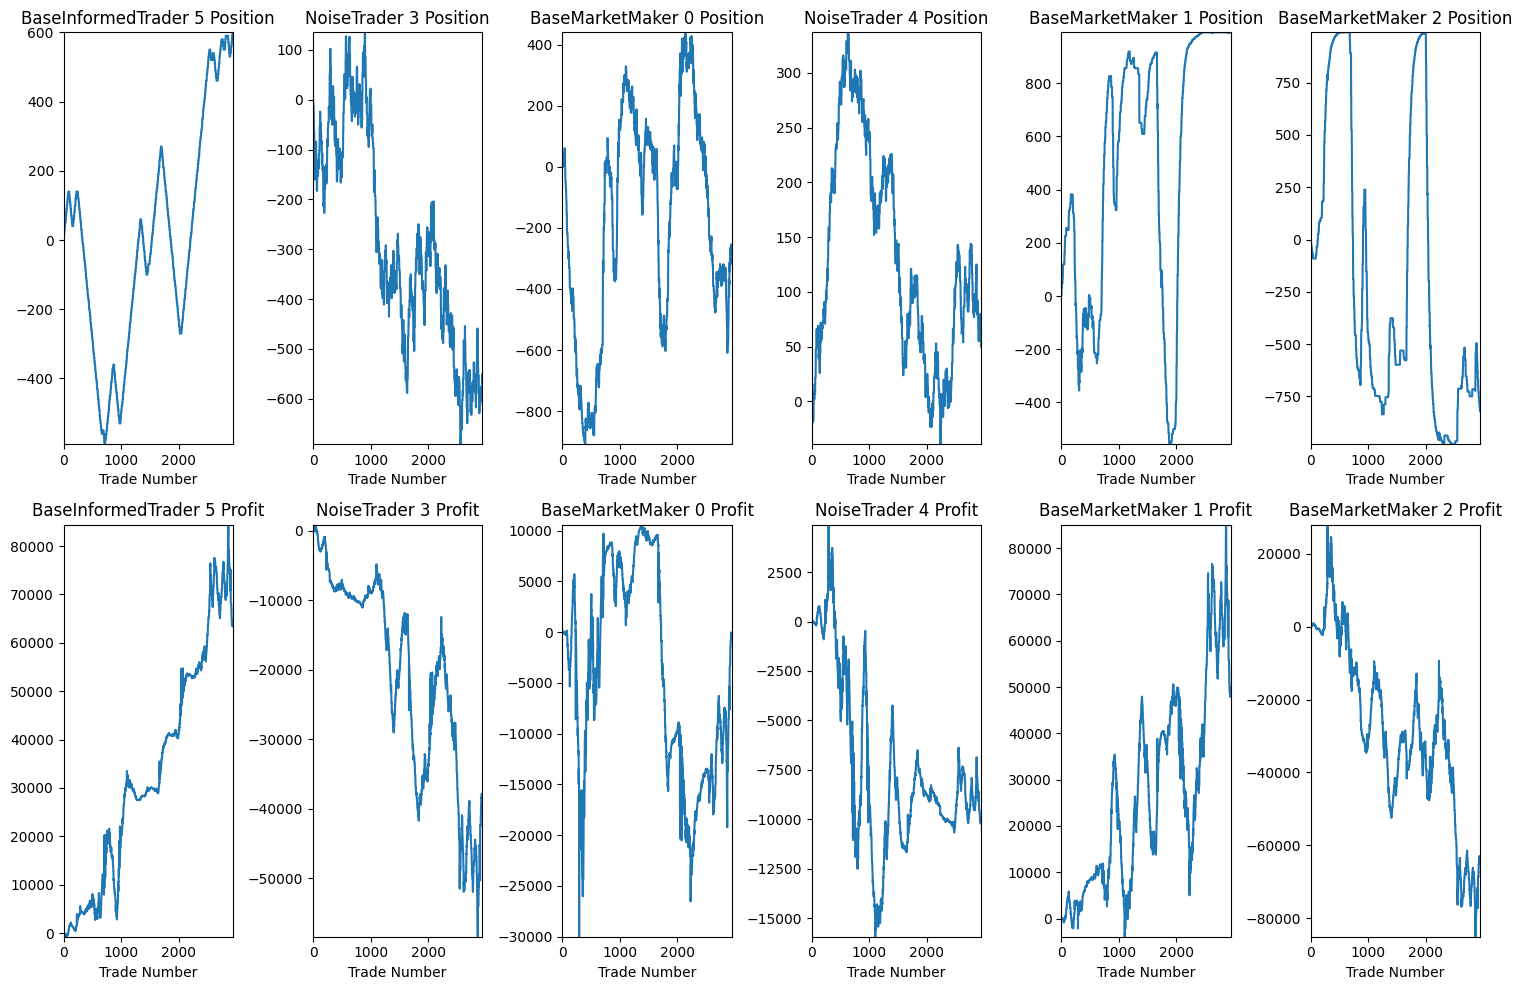

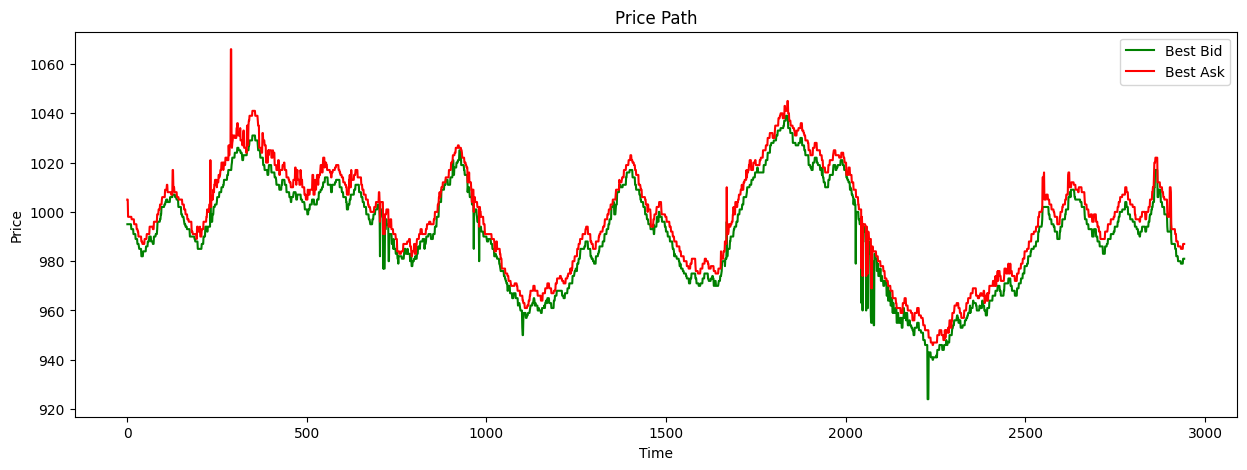

In [ ]:
participant_comparison(market.participants)
price_path(market)

<Axes: >

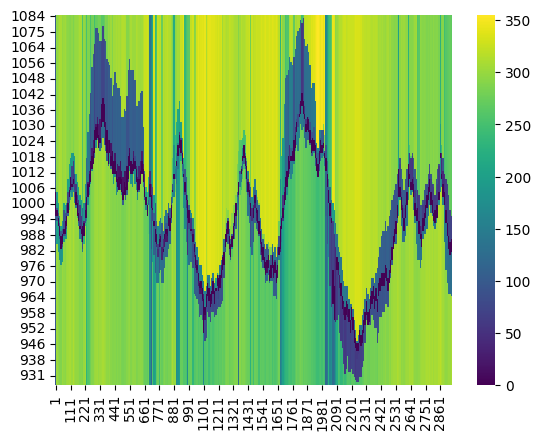

In [ ]:
sns.heatmap(order_book_heatmap(market, 10), cmap='viridis')

In [ ]:
participants_report(market.participants)

,NoiseTrader_3,BaseInformedTrader_5,NoiseTrader_4,BaseMarketMaker_2,BaseMarketMaker_0,BaseMarketMaker_1
final_profit,-71988.00,78959.50,-19786.00,-94536.00,59412.00,47938.50
final_position,122.00,-421.00,-214.00,636.00,-958.00,835.00
profit_per_state,-24.56,26.94,-6.75,-32.25,20.27,16.36
std_profit_per_state,802.26,1328.78,204.52,1354.44,1506.81,1067.92
information_ratio,-0.03,0.02,-0.03,-0.02,0.01,0.02
total_trades,595.00,458.00,535.00,471.00,884.00,925.00
volume_traded,13410.00,4301.00,4922.00,8202.00,11994.00,14095.00
profit_per_volume,-5.37,18.36,-4.02,-11.53,4.95,3.40
average_trade_size,22.54,9.39,9.20,17.41,13.57,15.24
fill_rate,1.00,1.00,1.00,0.08,0.12,0.14


<Axes: xlabel='time'>

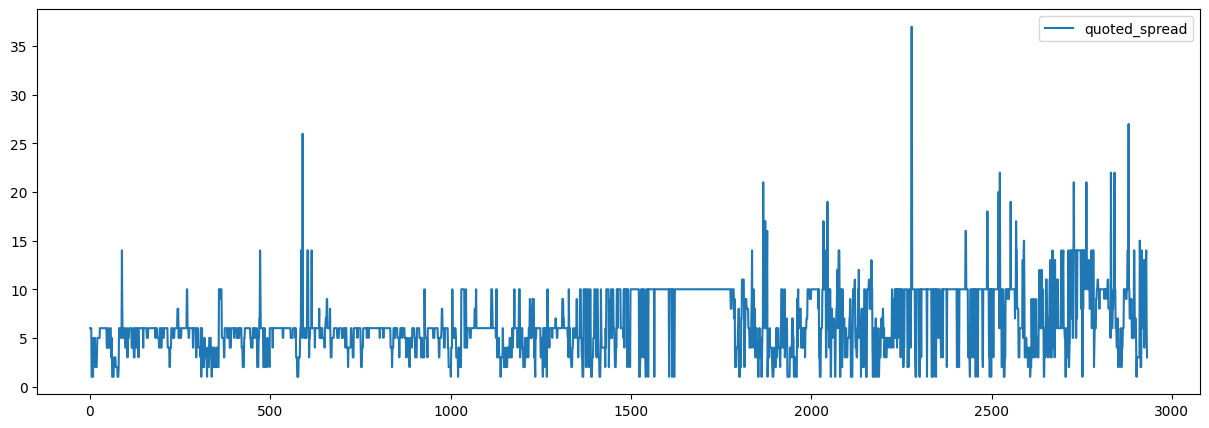

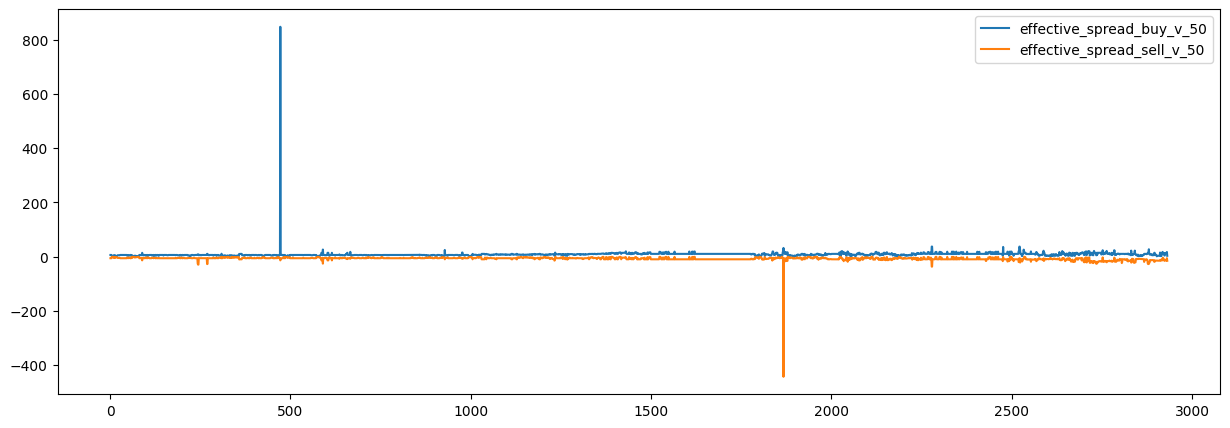

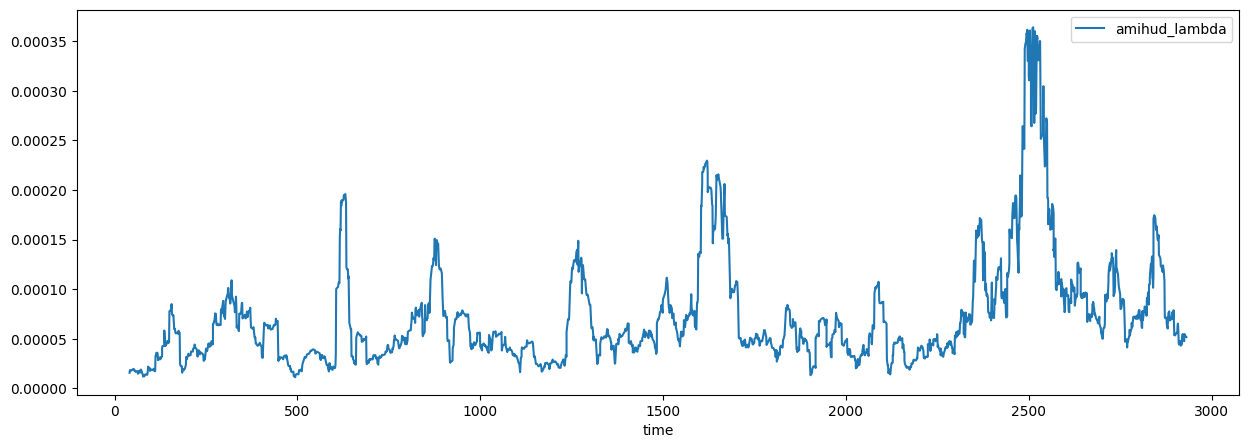

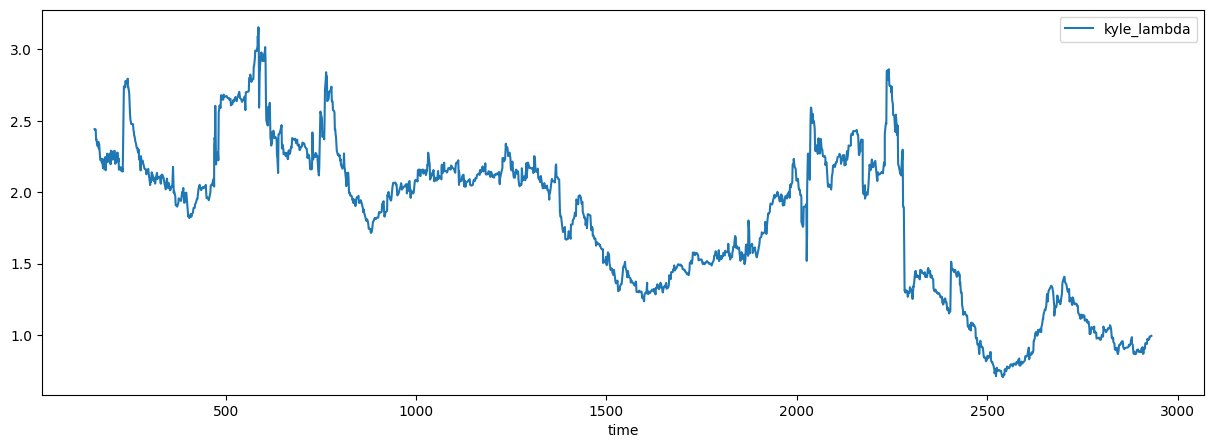

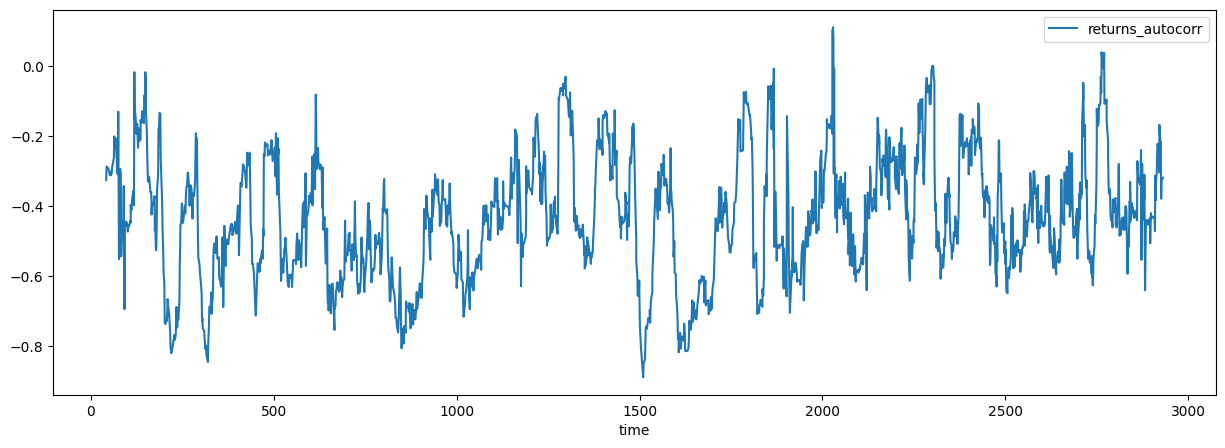

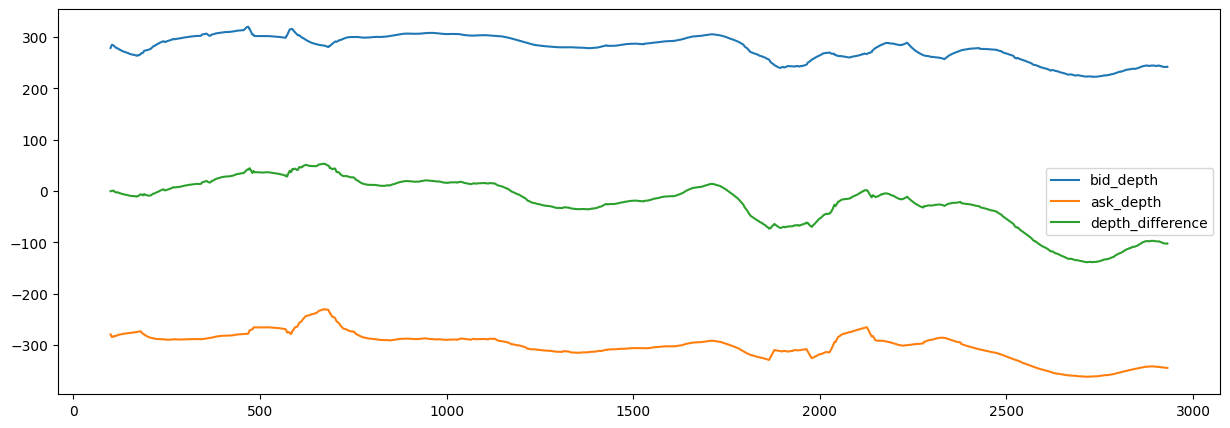

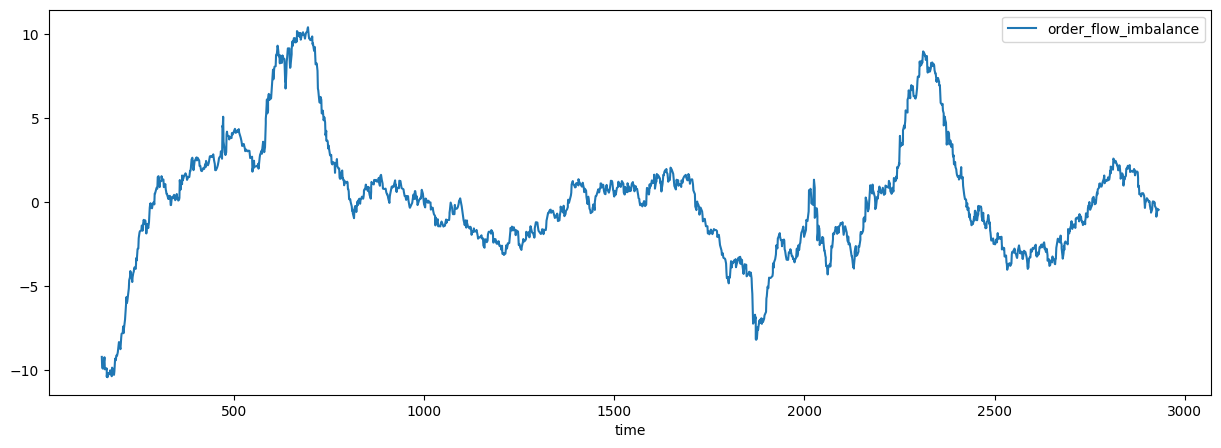

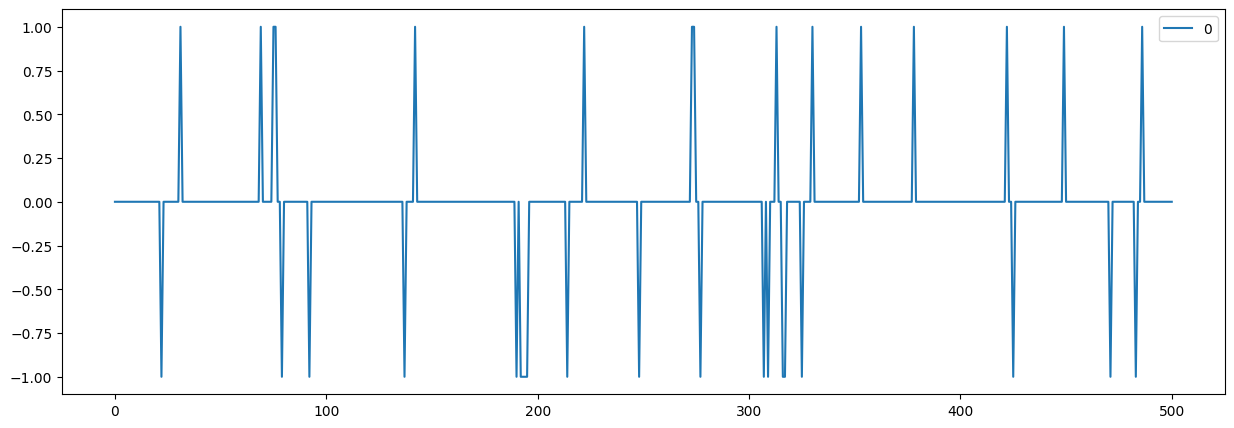

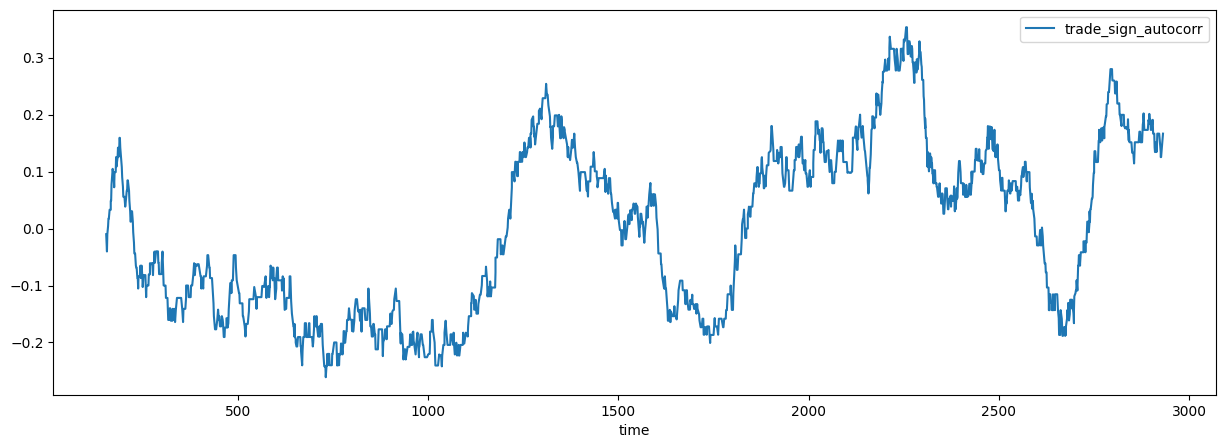

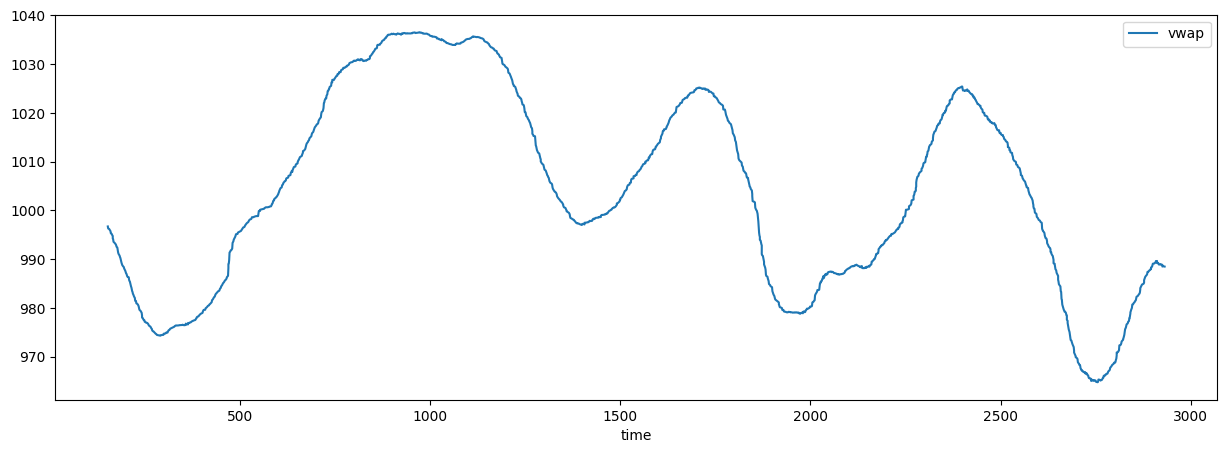

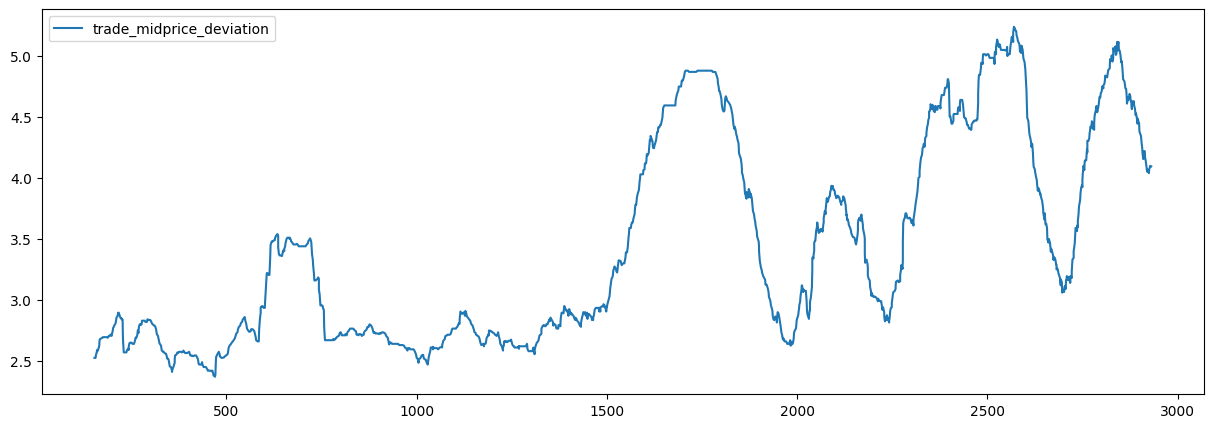

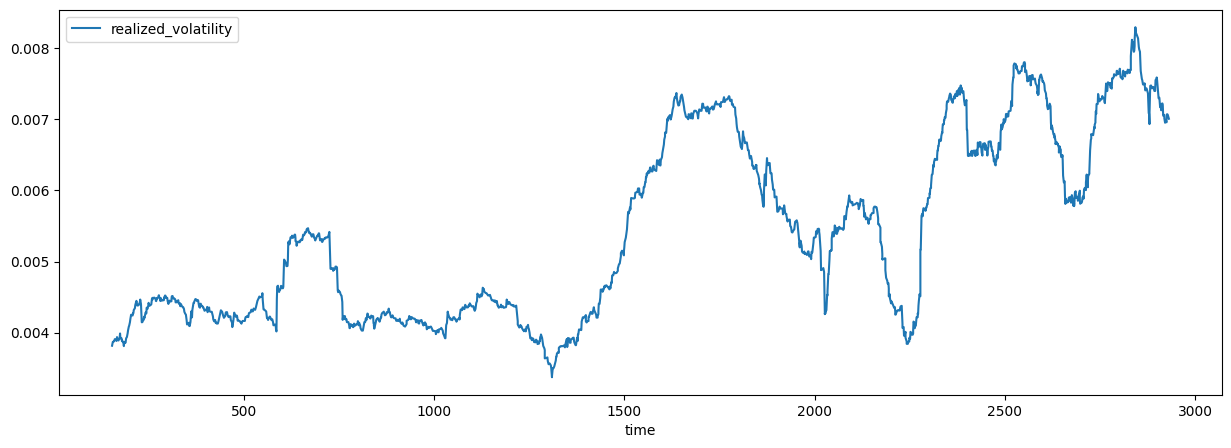

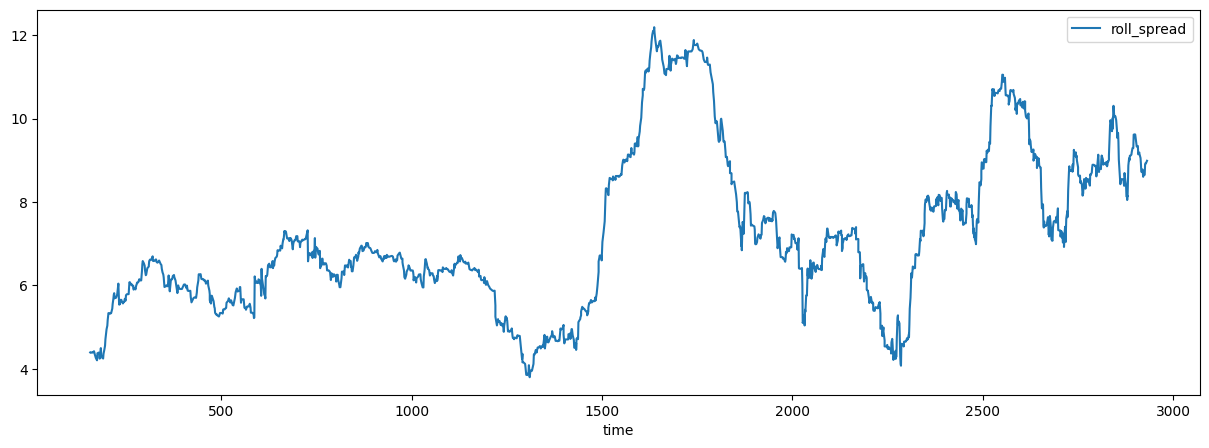

In [ ]:
quoted_spread(market).plot(figsize=(15,5))
effective_spread(market, volume=50).plot(figsize=(15,5))
amihud_illiquidity(market).plot(figsize=(15,5))
kyle_lambda(market).plot(figsize=(15,5))
returns_autocorrelation(market).plot(figsize=(15,5))
order_book_depth(market).plot(figsize=(15,5))
order_flow_imbalance(market).plot(figsize=(15,5))
news_goodness(market).plot(figsize=(15,5))
trade_sign_autocorrelation(market).plot(figsize=(15,5))
vwap(market).plot(figsize=(15,5))
trade_midprice_deviation(market).plot(figsize=(15,5))
realized_volatility(market).plot(figsize=(15,5))
roll_spread_estimator(market).plot(figsize=(15,5))

In [ ]:
market.ob_snapshots[450]

{'bid': [{'price': 990, 'volume': 66}, {'price': 988, 'volume': 253}],
 'ask': [{'price': 994, 'volume': -136},
  {'price': 1000, 'volume': -133},
  {'price': 1002, 'volume': -9}],
 'time': 451}

In [ ]:
from dill import dump, load

In [ ]:
with open('market.pkl', 'wb') as f:
    dump(market, f)

In [ ]:
with open('market.pkl', 'rb') as f:
    market = load(f)

In [ ]:
new_market = ContinuousDoubleAuction.load('market.pkl')

In [ ]:
new_market